#Proyek Akhir : Klasifikasi Gambar

1. Nama : Maulia Savana Putri
2. Email : mauliasavana72@gmail.com

Tujuan : Program Anda harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

##1. Setting Up The System

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-11 07:39:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.0MB/s    in 57s     

2021-05-11 07:40:16 (5.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



##2. Preparing The Dataset

We will first prepare the dataset and separate out the images:

1. We first divide the folder contents into the train and validation directories.
2. Then, in each of the directories, create a separate directory for rock that contains only rock images, paper that contains only papeer images, and a separate director for scissors having only scissors images.

In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/hasil_split',seed=1337, ratio=(.6,.4,))

Copying files: 2188 files [00:00, 3265.90 files/s]


In [5]:
base_dir = '/tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

In [7]:
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

##3. Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

##4. Training and Validation Sets

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=32, 
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


##5. Build The Model 

In [90]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## 6. Compile and Fit

In [118]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('val_accuracy') > 0.99):
      print('Akurasi mencapai 99% maka batalkan pelatihan!')
      self.model.stop_training = True

callbacks = CustomCallback()

In [119]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [120]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/20
25/25 - 23s - loss: 0.0841 - accuracy: 0.9725 - val_loss: 0.0821 - val_accuracy: 0.9812
Epoch 2/20
25/25 - 22s - loss: 0.0457 - accuracy: 0.9850 - val_loss: 0.0083 - val_accuracy: 1.0000
Akurasi mencapai 99% maka batalkan pelatihan!


In [41]:
 print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


##7. Prediction Model

###Scissors

Saving scissors.JPG to scissors (2).JPG
scissors.JPG
scissors


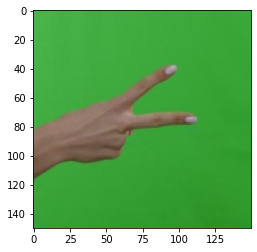

In [121]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes)

  print(fn)
  if classes[0][0] == 1:
      print('paper')
  elif classes[0][1] == 1:
      print('rock')
  elif classes[0][2] == 1:
      print('scissors')
  else:
    print('No result found !')

Saving pic4.jpg to pic4 (1).jpg
pic4.jpg
scissors


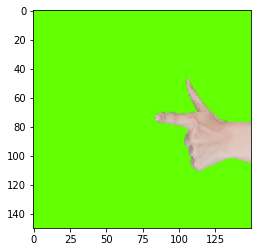

In [122]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes)

  print(fn)
  if classes[0][0] == 1:
      print('paper')
  elif classes[0][1] == 1:
      print('rock')
  elif classes[0][2] == 1:
      print('scissors')
  else:
    print('No result found !')

###Rock

Saving batu.jpg to batu (3).jpg
batu.jpg
rock


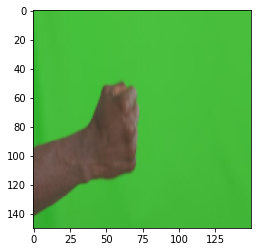

In [123]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes)

  print(fn)
  if classes[0][0] == 1:
      print('paper')
  elif classes[0][1] == 1:
      print('rock')
  elif classes[0][2] == 1:
      print('scissors')
  else:
    print('No result found !')

Saving pic3.jpg to pic3 (1).jpg
pic3.jpg
rock


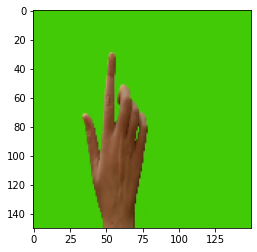

In [124]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes)

  print(fn)
  if classes[0][0] == 1:
      print('paper')
  elif classes[0][1] == 1:
      print('rock')
  elif classes[0][2] == 1:
      print('scissors')
  else:
    print('No result found !')

###Paper

Saving kertas.jpg to kertas (2).jpg
kertas.jpg
paper


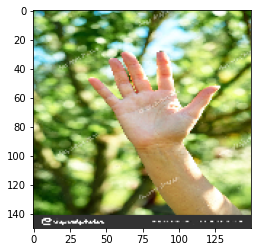

In [125]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes)

  print(fn)
  if classes[0][0] == 1:
      print('paper')
  elif classes[0][1] == 1:
      print('rock')
  elif classes[0][2] == 1:
      print('scissors')
  else:
    print('No result found !')

###No Results Found

Saving pic8.jpg to pic8 (1).jpg
pic8.jpg
No result found !


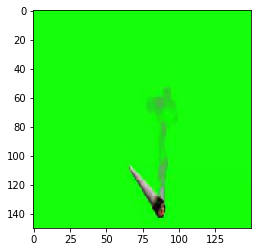

In [126]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes)

  print(fn)
  if classes[0][0] == 1:
      print('paper')
  elif classes[0][1] == 1:
      print('rock')
  elif classes[0][2] == 1:
      print('scissors')
  else:
    print('No result found !')